In [49]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [63]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#june_temps = []
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [64]:
#  3. Convert the June temperatures to a list
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(june_temps)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [79]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'June temps']) 
print(june_temps_df)

            date  June temps
0     2010-06-01        78.0
1     2010-06-02        76.0
2     2010-06-03        78.0
3     2010-06-04        76.0
4     2010-06-05        77.0
...          ...         ...
1695  2017-06-26        79.0
1696  2017-06-27        74.0
1697  2017-06-28        74.0
1698  2017-06-29        76.0
1699  2017-06-30        75.0

[1700 rows x 2 columns]


In [80]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [81]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)


In [68]:
# 7. Convert the December temperatures to a list.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

#print(dec_temps)

In [77]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date', 'December temps'])

#print(dec_temps_df)

In [78]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# Additional Queries for Summary

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


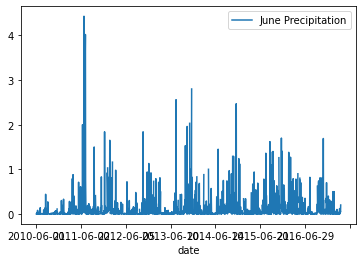

In [100]:
# Query that filters the Measurement table to retrieve the precipitation for the month of June.
june_precip = []
june_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
#print(june_precip)

# june_precip into DataFrame
june_precip_df = pd.DataFrame(june_precip, columns=['date', 'June Precipitation'])

#set index to date
june_precip_df.set_index(june_precip_df['date'], inplace=True)
# sort june_precip by date
june_precip_df = june_precip_df.sort_index()
#plot
june_precip_df.plot()

#describe
june_precip_df.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


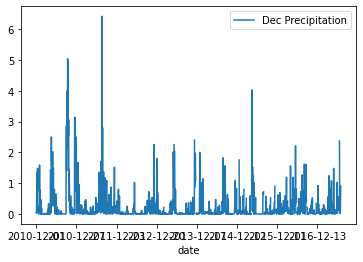

In [101]:
# Query that filters the Measurement table to retrieve the precipitation for the month of Dec.
dec_precip = []
dec_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
#print(dec_precip)

# dec_precip into DataFrame
dec_precip_df = pd.DataFrame(dec_precip, columns=['date', 'Dec Precipitation'])

#set index to date
dec_precip_df.set_index(dec_precip_df['date'], inplace=True)
# sort dec_precip by date
dec_precip_df = dec_precip_df.sort_index()
#plot
dec_precip_df.plot()

#describe
dec_precip_df.describe()